# Data preprocessing
Cleaning data by removing \n characters, then we perform NFD transformation to separate diacritics from the simple characters (except ~) and go back to NFC ([source here](https://es.stackoverflow.com/questions/135707/c%C3%B3mo-puedo-reemplazar-las-letras-con-tildes-por-las-mismas-sin-tilde-pero-no-l)). This way we converted all characters with diacritics to the simple character. Finally, 5-letter words are saved in a list.

## Letter frequency visualization
Counter object from colletions is used to count the frequency of each letter. Then, a histogram is used to visualize these values.

Counter({'a': 10730, 'e': 6850, 'o': 6194, 'r': 4417, 'i': 3912, 'l': 3262, 's': 3218, 'n': 2919, 'c': 2781, 'u': 2621, 't': 2462, 'p': 1982, 'm': 1867, 'd': 1775, 'b': 1462, 'g': 1245, 'f': 926, 'h': 914, 'j': 882, 'v': 846, 'z': 697, 'ñ': 416, 'y': 370, 'x': 135, 'q': 130, 'k': 46, 'w': 8})
12614


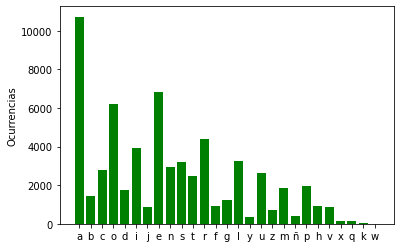

In [2]:
from collections import Counter
import re
from unicodedata import normalize
import matplotlib.pyplot as plt

data = open('0_palabras_todas.txt', encoding="utf8")
count = 0
words = []
chars = Counter()

while True:
    count +=1
    line = data.readline()
    line = line[:-1]

    if not line:
        break
    
    if (len(line) == 5):
        # -> NFD y eliminar diacríticos
        line = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", line), 0, re.I
    )

        # -> NFC
        line = normalize('NFC', line)
        words.append(line)
        chars.update(Counter(line))


chars.pop('O')
chars.pop('(')
chars.pop(' ')
print(chars)
print(len(words))
data.close()
plt.bar(list(chars.keys()), chars.values(), color='g')
plt.ylabel('Ocurrencias')
plt.show()

# get frequency
#https://es.stackoverflow.com/questions/135707/c%C3%B3mo-puedo-reemplazar-las-letras-con-tildes-por-las-mismas-sin-tilde-pero-no-l

In [3]:
import numpy as np
variations = 3^5

    
def prob(n_words, seq):
    """
    A pattern for two words represents the worle-similarity
    pattern (gray -> 0, yellow -> 1, green -> 2) but as an integer
    between 0 and 3^5. Reading this integer in ternary gives the
    associated pattern.
    """
    pass
    #return entropy(seq, base=2)

def remove_at(i, s):
    return s[:i] + s[i+1:]

def guess(wordlist, sel_word, pattern):
    '''
    Given a word and its pattern, reduce the list of possible words given that pattern.
    '''
    # First, we extract the ternary info from the word and the pattern, to see which letter we will ignore, etc..
    # Getting indeces:
    ind_gray = [i for i,x in enumerate(pattern) if x==0]
    ind_yellow = [i for i,x in enumerate(pattern) if x==1]
    ind_green = [i for i,x in enumerate(pattern) if x==2]

    ignore = [sel_word[ind] for ind in ind_gray]
    present = [sel_word[ind] for ind in ind_yellow]
    correct = [sel_word[ind] for ind in ind_green]
    # ignore contains letters that are gray (we don't need the index)
    # present contains letters that are yellow (we will need to use also the index, maybe tuple or dict)
    # correct contains letters that are green (we will need to use also the index, maybe tuple or dict)

    # Loop
    new_wordlist = []
    for word in wordlist:
        char_list = ignore
        match = [characters in char_list for characters in word]
        if not any(match):
            # Now we have words that do not contain gray letters
            correct_pos = [word[ind] for ind in ind_green]
            if correct_pos == correct:
                # Now we have words that have green chars in the respective position
                # Pick the word, remove the char in the index pos of yellow and check if exists in the other chars
                c = 0
                for l in ind_yellow:
                    temp = remove_at(l,word)
                    match = [e for e in present if e in temp]
                    if any(match):
                        c += 1

                if c == len(present):
                    # Now we have yellow words also
                    new_wordlist.append(word)

    return new_wordlist

wordlist = ['cajon', 'casal', 'finca', 'helio','jabon', 'fusil', 'cebra', 'horno', 'fiero', 'lloro']

a = guess(wordlist, 'barco', [0,0,1,0,2])
print(a)

['fiero', 'lloro']


In [8]:
wordlist = words
guess_word = 'jabon'
pattern = [2,0,0,0,0]

wordlist = guess(wordlist, guess_word, pattern)
print(wordlist)
print(len(wordlist))

['jeliz', 'jemer', 'jeque', 'jerez', 'jetee', 'jetee', 'jigue', 'jimes', 'jiñes', 'jipie', 'jipie', 'jirel', 'juete', 'jugue', 'jumee', 'jumee', 'jumes', 'jumil', 'juñir', 'jupee', 'jupee', 'jurel', 'jures', 'juste', 'juste']
25


In [39]:
def ternary_to_list(number):
    res = [0,0,0,0,0]
    len_number = len(str(number))
    for i in range(len_number): res[4-i] = int(str(number)[len_number-1-i]) 
    return res

def list_to_ternary(number):
    res = ""
    for i in range(len(number)): res += str(number[i])
    return int(res)

In [36]:
list_to_ternary([0,0,1,0,2])

102

In [40]:
ternary_to_list(102)

[0, 0, 1, 0, 2]

## Computing probabilities
There are $3^5$ possible patterns, as there are only 3 states and 5 squares.

In [15]:
import itertools

def gen_patterns(states,squares):
    '''
    This functions generates all of the possible pattern combinations.
    '''
    l = [i for i in range(states)]

    # for L in range(0, len(l)):
    #     itertools.combinations(L,squares)
    return itertools.combinations(l,squares)

a = gen_patterns(3,5)
for elem in a:
    print(elem)
